# Prediction of house price using linear regression

#### Importing required  libraries

In [275]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


#### Exploratory Data Analysis

In [276]:
#Loading the dataset
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [277]:
# Data types
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [278]:
# Converting bedrooms, bathrooms, floors, lat, long into integers
house_data['bathrooms'] = np.round(house_data['bathrooms'])
house_data['floors'] = np.round(house_data['floors'])
house_data['lat'] = np.round(house_data['lat'])
house_data['long'] = np.round(house_data['long'])


In [279]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [280]:
# Complete information about the data
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [281]:
# Transforming data column into date time
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['Month'] = house_data['date'].apply(lambda date: date.month)
house_data['Year'] = house_data['date'].apply(lambda date: date.year)

In [282]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,1955,0,98178,48.0,-122.0,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,400,1951,1991,98125,48.0,-122.0,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,0,1933,0,98028,48.0,-122.0,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,910,1965,0,98136,48.0,-122.0,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,0,1987,0,98074,48.0,-122.0,1800,7503,2,2015


In [283]:
#Data Exploration: Summarize the data
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.058715,2079.899736,1.510697e+04,1.534956,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.694304,-122.000046,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.673622e+05,0.930062,0.755524,918.440897,4.142051e+04,0.554742,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.460712,0.040243,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000,12.000000,2015.000000


In [284]:
#Shape
house_data.shape

(21613, 23)

In [285]:
# Count rows
house_data.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
Month            21613
Year             21613
dtype: int64

In [286]:
house_data.drop(['id','date'],inplace=True,axis=1)

In [287]:
# No missing values
house_data.isna().head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Correlation using heatmaps

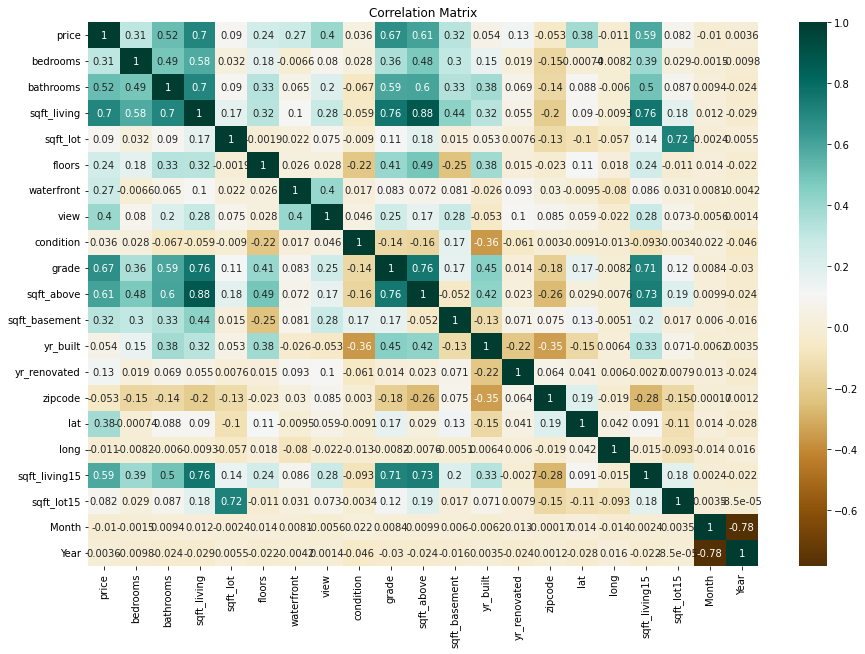

In [288]:
# Correlation Heatmap
plt.figure(figsize = (15, 10))
c= house_data.corr()
sns.heatmap(c,cmap = 'BrBG', annot = True)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

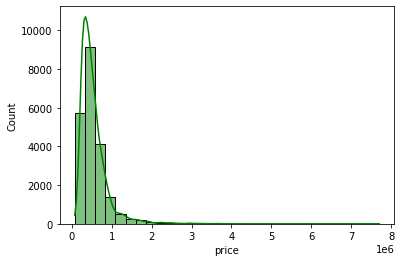

In [289]:
sns.histplot(house_data['price'],kde=True,color='green',bins=30)

<AxesSubplot:xlabel='Year', ylabel='price'>

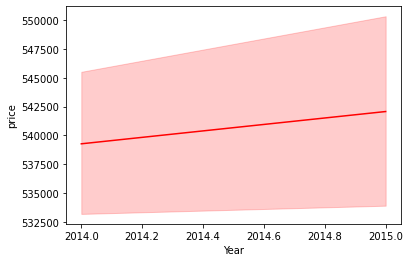

In [290]:
#A linear analysis showing the increase of the price along the years.
sns.lineplot(x='Year',y='price',data=house_data, color='red')

The graph shows that the price of the house increase as the grade comes higher.

<AxesSubplot:xlabel='grade', ylabel='price'>

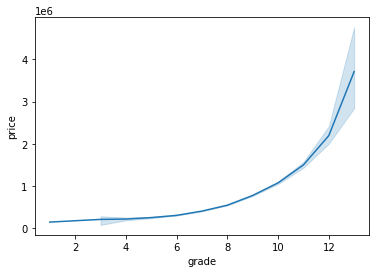

In [291]:
# Visualization of grade and price
sns.lineplot(x='grade',y='price',data=house_data)


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

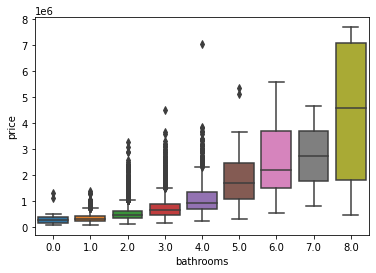

In [292]:
# Visualizing the number of bathrooms and price
sns.boxplot(x='bathrooms',y='price',data=house_data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

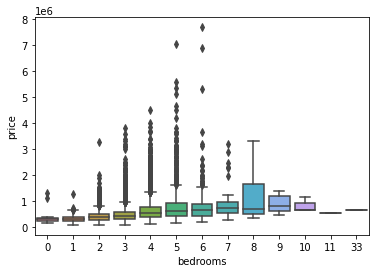

In [293]:
# Visualizing the number of bedrooms and price
sns.boxplot(x='bedrooms',y='price',data=house_data)

**the graph shows that, the residences have more houses with 3 and 4 bedrooms than the others dont have the highest price as we can expect.This means that are other attributes that can increase the price of a house rather than number of bedrooms and bathrooms of the house.**

## Creating models

In [294]:
# Extract Features for prediction
X = house_data.drop(['price','Month','Year'], axis=1).values
y = house_data['price'].values

In [295]:
X

array([[ 3.000e+00,  1.000e+00,  1.180e+03, ..., -1.220e+02,  1.340e+03,
         5.650e+03],
       [ 3.000e+00,  2.000e+00,  2.570e+03, ..., -1.220e+02,  1.690e+03,
         7.639e+03],
       [ 2.000e+00,  1.000e+00,  7.700e+02, ..., -1.220e+02,  2.720e+03,
         8.062e+03],
       ...,
       [ 2.000e+00,  1.000e+00,  1.020e+03, ..., -1.220e+02,  1.020e+03,
         2.007e+03],
       [ 3.000e+00,  2.000e+00,  1.600e+03, ..., -1.220e+02,  1.410e+03,
         1.287e+03],
       [ 2.000e+00,  1.000e+00,  1.020e+03, ..., -1.220e+02,  1.020e+03,
         1.357e+03]])

In [296]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [297]:
X.shape,y.shape

((21613, 18), (21613,))

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [299]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14048, 18), (14048,), (7565, 18), (7565,))

In [300]:
# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### PREDICTING USING LINEAR REGRESSION MODEL

In [301]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [302]:
y_pred = regressor.predict(X_test)

In [303]:
y_pred

array([ 396810.62602133,  745488.03068991, 1248161.80112601, ...,
        148744.52292688, 1469903.60956868,  260862.10597758])

In [304]:
y_test

array([ 365000.,  865000., 1040000., ...,  235000., 2890000.,  275000.])

In [305]:
score_regressor = regressor.score(X_train,y_train)
score_regressor 

0.7118805679548106

In [306]:
regressor.coef_[0]

-27207.30741617591

In [307]:
regressor.intercept_

17472735.399687875

In [308]:
mean_absolute_error=mean_absolute_error(y_test,y_pred)
print(mean_absolute_error)


123670.2459881878


In [309]:
mean_squared_error=mean_squared_error(y_test,y_pred)
print(mean_squared_error)


46317739431.46898


In [310]:
root_mean_squared_error=np.sqrt(mean_squared_error)
print(root_mean_squared_error)

215215.56503066636


In [311]:
preco_lin_reg = house_data['price']
predict_lin_reg = pd.Series(y_pred)
error_lin_reg = preco_lin_reg-predict_lin_reg
data_lin_reg = {'Price':preco_lin_reg,'Predictions':predict_lin_reg,'Error':error_lin_reg}
data_prev_lin_reg = pd.DataFrame(data_lin_reg)
data_prev_lin_reg.head()

,Price,Predictions,Error
0,221900.0,3.968106e+05,-1.749106e+05
1,538000.0,7.454880e+05,-2.074880e+05
2,180000.0,1.248162e+06,-1.068162e+06
3,604000.0,1.594771e+06,-9.907712e+05
4,510000.0,7.279855e+05,-2.179855e+05


**The above shows the predictions and errors for house price using linear regression model**

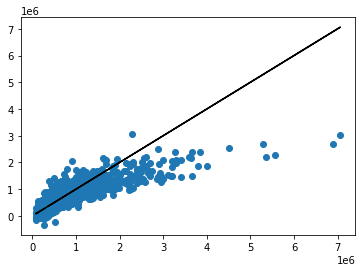

In [312]:
# Visualizing data on linear regression graph
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='black')